In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
import pandas as pd
import numpy as np
import io

#데이터 불러오기
df = pd.read_csv(io.BytesIO(uploaded['vgames2.csv']))
df = df.dropna(axis=0)
df['Year'] = df['Year'].astype(int)

#중복된 게임명 제거
df = df.drop_duplicates(['Name'])
df.iloc[:12]
df.shape

(11410, 9)

In [ ]:
#Sales 데이터의 단위는 Million, 따라서 K, M 지우고 단위 변환

df.NA_Sales = (df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
 
df.EU_Sales = (df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
 
df.JP_Sales = (df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))
df.Other_Sales = (df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
           .replace(['K','M'], [10**-3, 1]).astype(int))



In [ ]:
#함수 이용하여 연도 수정
def test(x):
      if x >=50 and x < 1000: return x+1900 
      elif x >= 0 and x < 50: return x+2000
      else: return x
df['Year'] = df['Year'].apply(test)
df

,Name,Publisher,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Brothers in Arms: Furious 4,Gearbox Software,X360,2000,Shooter,0.01,0.00,0.00,0.00
2,Trade & Battle: Card Hero,Nintendo,GB,2000,Strategy,0.00,0.00,0.20,0.00
3,Strider 2,Virgin Interactive,PS,2000,Platform,0.05,0.03,0.00,0.01
4,Point Blank 3,Namco Bandai Games,PS,2000,Shooter,0.01,0.01,0.00,0.00
5,SplashDown,Atari,PS2,2001,Racing,0.34,0.27,0.00,0.09
...,...,...,...,...,...,...,...,...,...
16590,Hangman,Atari,2600,2017,Puzzle,0.00,0.02,0.00,0.00
16592,Brothers Conflict: Precious Baby,Idea Factory,PSV,2017,Action,0.00,0.00,0.01,0.00
16593,Phantasy Star Online 2 Episode 4: Deluxe Package,Sega,PS4,2017,Role-Playing,0.00,0.00,0.03,0.00
16596,Drake of the 99 Dragons,Unknown,XB,2018,Shooter,0.05,0.01,0.00,0.00


In [ ]:
df.sort_values(['Year'], ascending=True)

,Name,Publisher,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
104,Combat,Atari,2600,1977,Action,1.17,0.07,0.00,0.01
103,Indy 500,Atari,2600,1977,Racing,0.26,0.01,0.00,0.00
102,Air-Sea Battle,Atari,2600,1977,Shooter,0.91,0.06,0.00,0.01
106,Super Breakout,Atari,2600,1978,Puzzle,0.41,0.03,0.00,0.00
109,Space Invaders,Atari,2600,1978,Shooter,2.36,0.14,0.00,0.03
...,...,...,...,...,...,...,...,...,...
16590,Hangman,Atari,2600,2017,Puzzle,0.00,0.02,0.00,0.00
16592,Brothers Conflict: Precious Baby,Idea Factory,PSV,2017,Action,0.00,0.00,0.01,0.00
16593,Phantasy Star Online 2 Episode 4: Deluxe Package,Sega,PS4,2017,Role-Playing,0.00,0.00,0.03,0.00
16596,Drake of the 99 Dragons,Unknown,XB,2018,Shooter,0.05,0.01,0.00,0.00


1 지역에 따라서 선호하는 게임 장르가 다를까?

In [ ]:
#1 지역에 따라서 선호하는 게임 장르가 다를까?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

Text(0, 0.5, 'Genre')

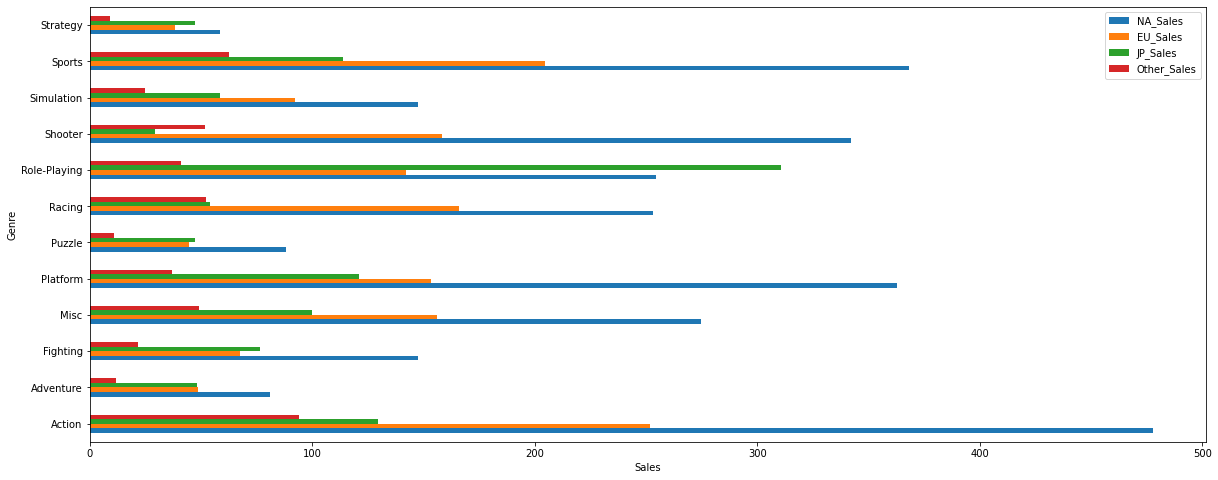

In [ ]:
#전체 지역별 장르 선호도
df1 = df.drop(['Year'], axis=1)
df1.groupby("Genre").sum()

plt.rcParams["figure.figsize"] = (20,8)
compare_plot = df1.groupby("Genre").sum().plot(kind='barh')
compare_plot.set_xlabel("Sales")
compare_plot.set_ylabel("Genre")

Text(0, 0.5, 'Genre')

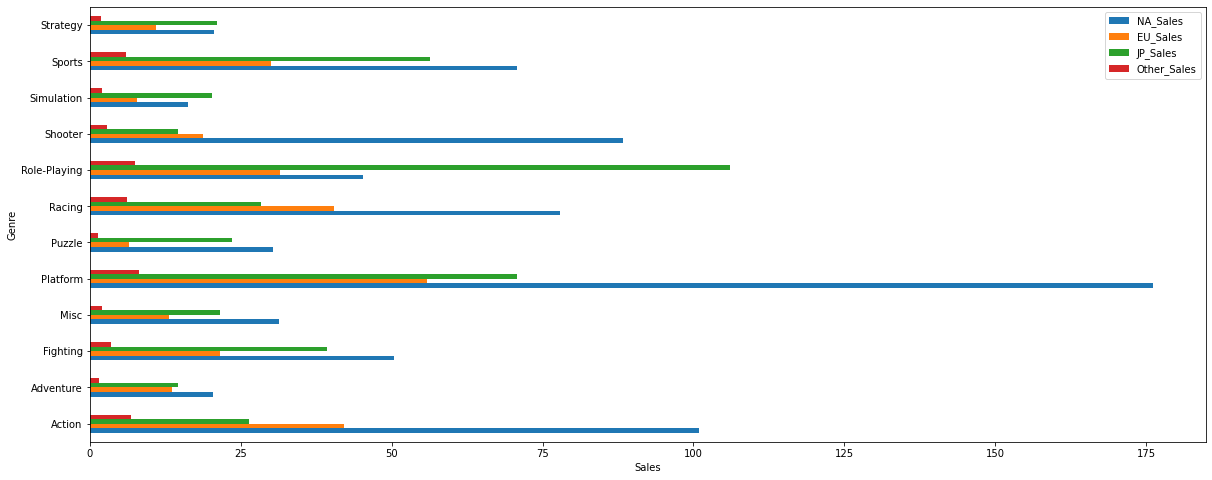

In [ ]:
#1900년대 선호 장르
df_year1 = df
df_year1 = df_year1[df_year1['Year'].between(1977, 1999)]
df_year1 = df_year1.drop(['Year'], axis=1)
region_year1_plot = df_year1.groupby("Genre").sum().plot(kind='barh')
region_year1_plot.set_xlabel("Sales")
region_year1_plot.set_ylabel("Genre")

Text(0, 0.5, 'Genre')

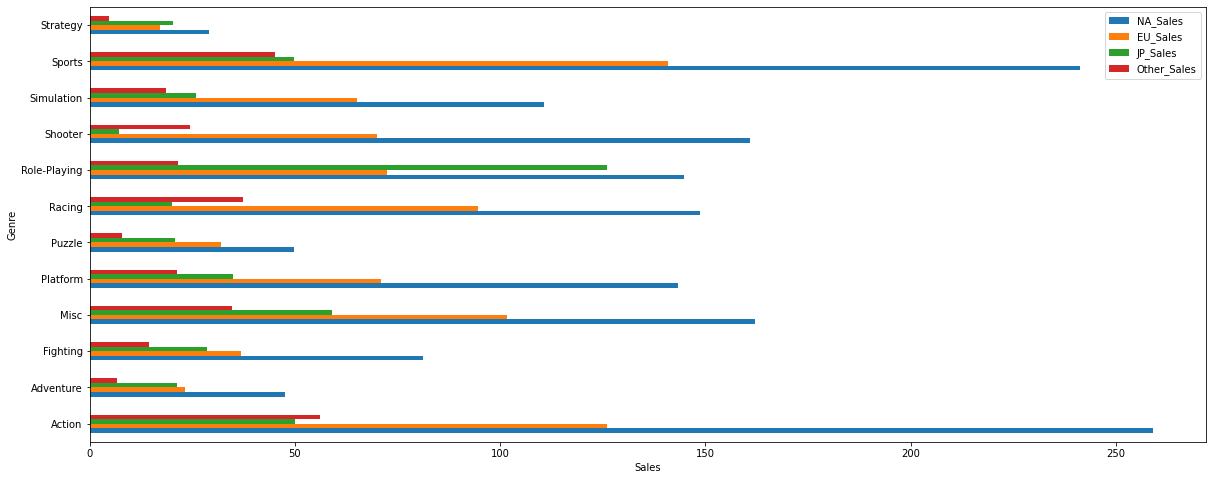

In [ ]:
#2000년대 선호 장르
df_year2 = df
df_year2 = df_year2[df_year2['Year'].between(2000, 2009)]
df_year2 = df_year2.drop(['Year'], axis=1)
region_year2_plot = df_year2.groupby("Genre").sum().plot(kind='barh')
region_year2_plot.set_xlabel("Sales")
region_year2_plot.set_ylabel("Genre")

Text(0, 0.5, 'Genre')

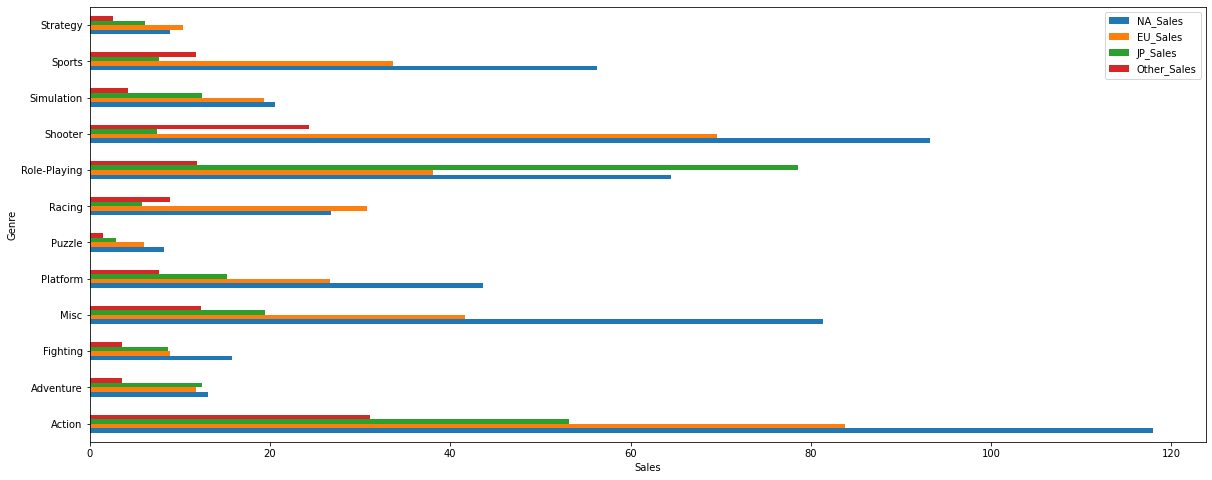

In [ ]:
#2010년대 선호 장르
df_year3 = df
df_year3 = df_year3[df_year3['Year'].between(2010, 2020)]
df_year3 = df_year3.drop(['Year'], axis=1)
region_year3_plot = df_year3.groupby("Genre").sum().plot(kind='barh')
region_year3_plot.set_xlabel("Sales")
region_year3_plot.set_ylabel("Genre")

In [ ]:
#지역별 장르 평균 매출 
NA_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['NA_Sales'].mean())
EU_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['EU_Sales'].mean())
JP_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['JP_Sales'].mean())
Other_Sales_Mean = (df.groupby(['Genre'], as_index=False).mean()
            .groupby('Genre')['Other_Sales'].mean())
Sales_Mean = pd.DataFrame([NA_Sales_Mean, EU_Sales_Mean, JP_Sales_Mean, Other_Sales_Mean])
Sales_Mean = Sales_Mean.T
Sales_Mean

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.250236,0.132006,0.067962,0.049298
Adventure,0.078131,0.046879,0.046445,0.011445
Fighting,0.241656,0.110410,0.125311,0.035656
Misc,0.211983,0.120579,0.077068,0.037809
Platform,0.618313,0.261670,0.205911,0.063288
Puzzle,0.178907,0.090061,0.095769,0.021802
Racing,0.329766,0.215977,0.070560,0.068333
Role-Playing,0.209811,0.117051,0.256005,0.033674
Shooter,0.419424,0.193971,0.035907,0.063358


Text(0, 0.5, 'Genre')

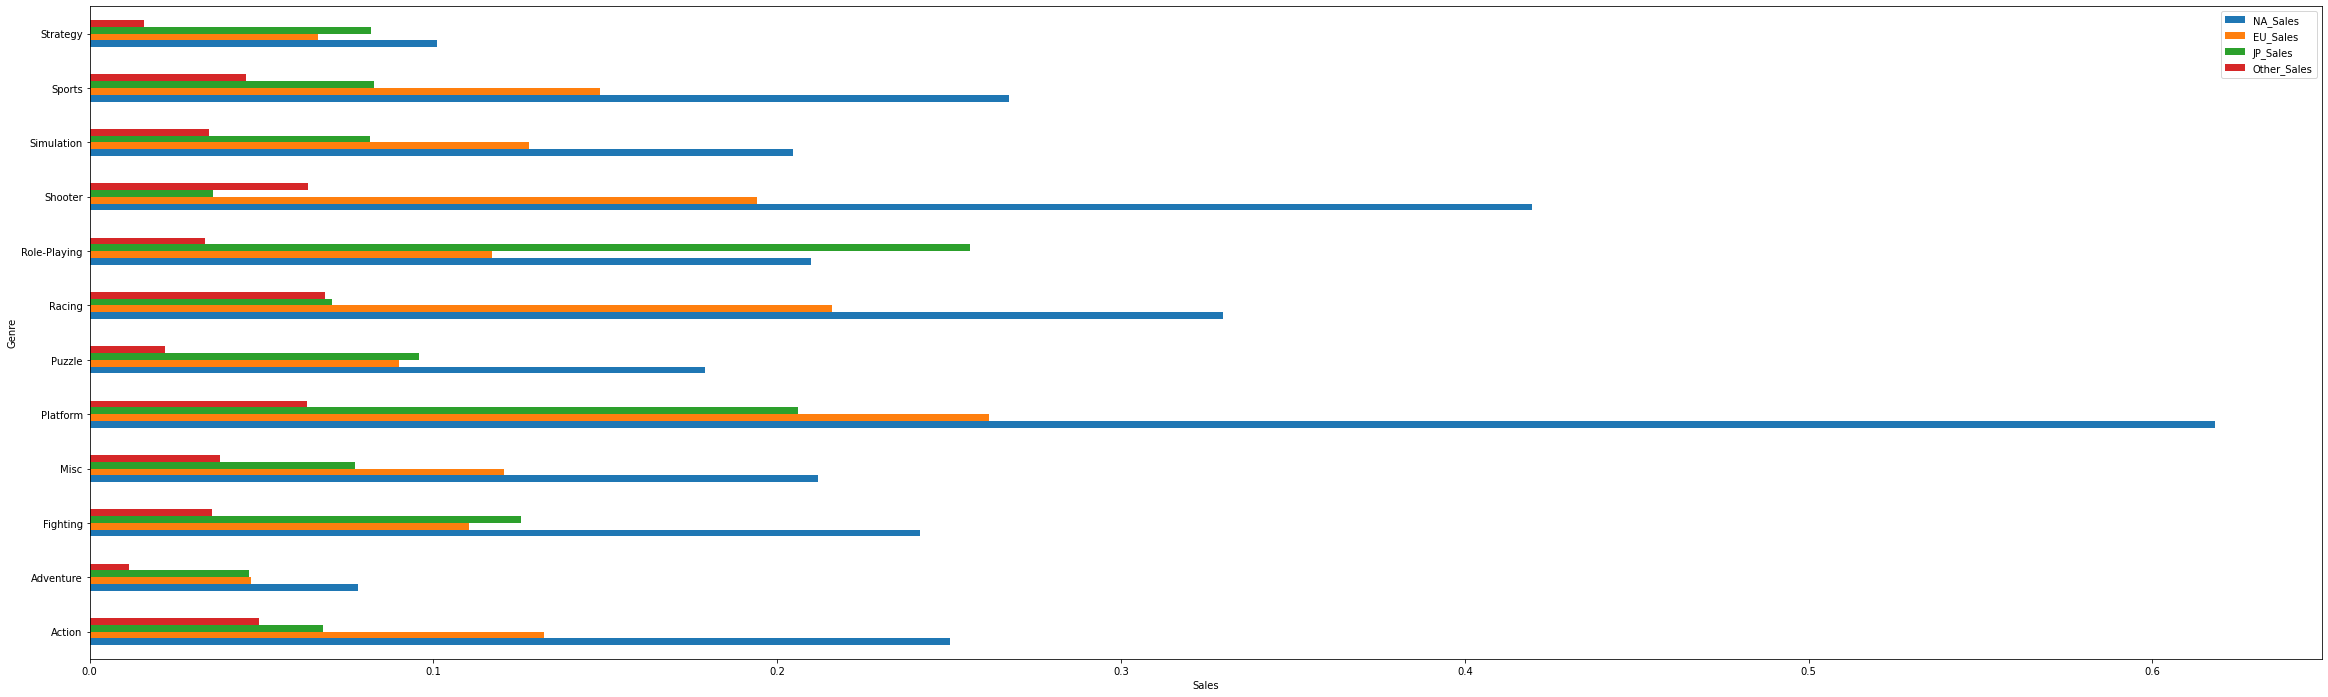

In [ ]:
#시각화 그래프 사이즈 조정
plt.rcParams["figure.figsize"] = (40,12)

#Sales 전체 평균 그래프
compare_plot = Sales_Mean.plot(kind='barh')
compare_plot.set_xlabel("Sales")
compare_plot.set_ylabel("Genre")

2. 연도별 게임(장르)의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

In [ ]:
df2 = df.copy()
list_of_my_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df2['Total_Sales'] = df[list_of_my_columns].sum(axis=1)
df2['Year'] = df2['Year'].astype(int)
df2.head()

,Name,Publisher,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Brothers in Arms: Furious 4,Gearbox Software,X360,2000,Shooter,0.01,0.00,0.0,0.00,0.01
2,Trade & Battle: Card Hero,Nintendo,GB,2000,Strategy,0.00,0.00,0.2,0.00,0.20
3,Strider 2,Virgin Interactive,PS,2000,Platform,0.05,0.03,0.0,0.01,0.09
4,Point Blank 3,Namco Bandai Games,PS,2000,Shooter,0.01,0.01,0.0,0.00,0.02
5,SplashDown,Atari,PS2,2001,Racing,0.34,0.27,0.0,0.09,0.70


In [ ]:
cross_df2 = pd.crosstab(df2.Genre, df2.Year)
cross_df = cross_df2.T
cross_df['Top'] = cross_df.idxmax(axis=1)
cross_df['Count'] = cross_df.max(axis=1)
cross_df = cross_df.reset_index()
cross_df.head()

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Top,Count
0,1977,1,0,0,0,0,0,1,0,1,0,0,0,Action,1
1,1978,1,0,0,0,0,2,0,0,1,0,1,0,Puzzle,2
2,1979,1,0,0,0,0,0,0,0,0,0,0,0,Action,1
3,1980,3,1,1,4,0,0,1,0,2,0,1,0,Misc,4
4,1981,25,0,0,0,3,2,1,0,10,1,4,0,Action,25


In [ ]:
from scipy.stats import chi2_contingency

obs = pd.crosstab(cross_df['Year'],cross_df['Count'])
print(chi2_contingency(obs, correction = False))
print(chi2_contingency(obs, correction = True))

#귀무가설 : Year & 연도별 Top 장르가 연관이 없다
#대립가설 : Year & 연도별 Top 장르가 연관이 없다
#신뢰구간 : 95%
#pvalue: 0.272로 귀무가설 채택 연관이 없다

(1290.0, 0.27219402721854785, 1260, array([[0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581],
       ...,
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581]]))
(1290.0, 0.27219402721854785, 1260, array([[0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581],
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325581, 0.02325581,
        0.02325581],
       ...,
       [0.11627907, 0.02325581, 0.02325581, ..., 0.02325

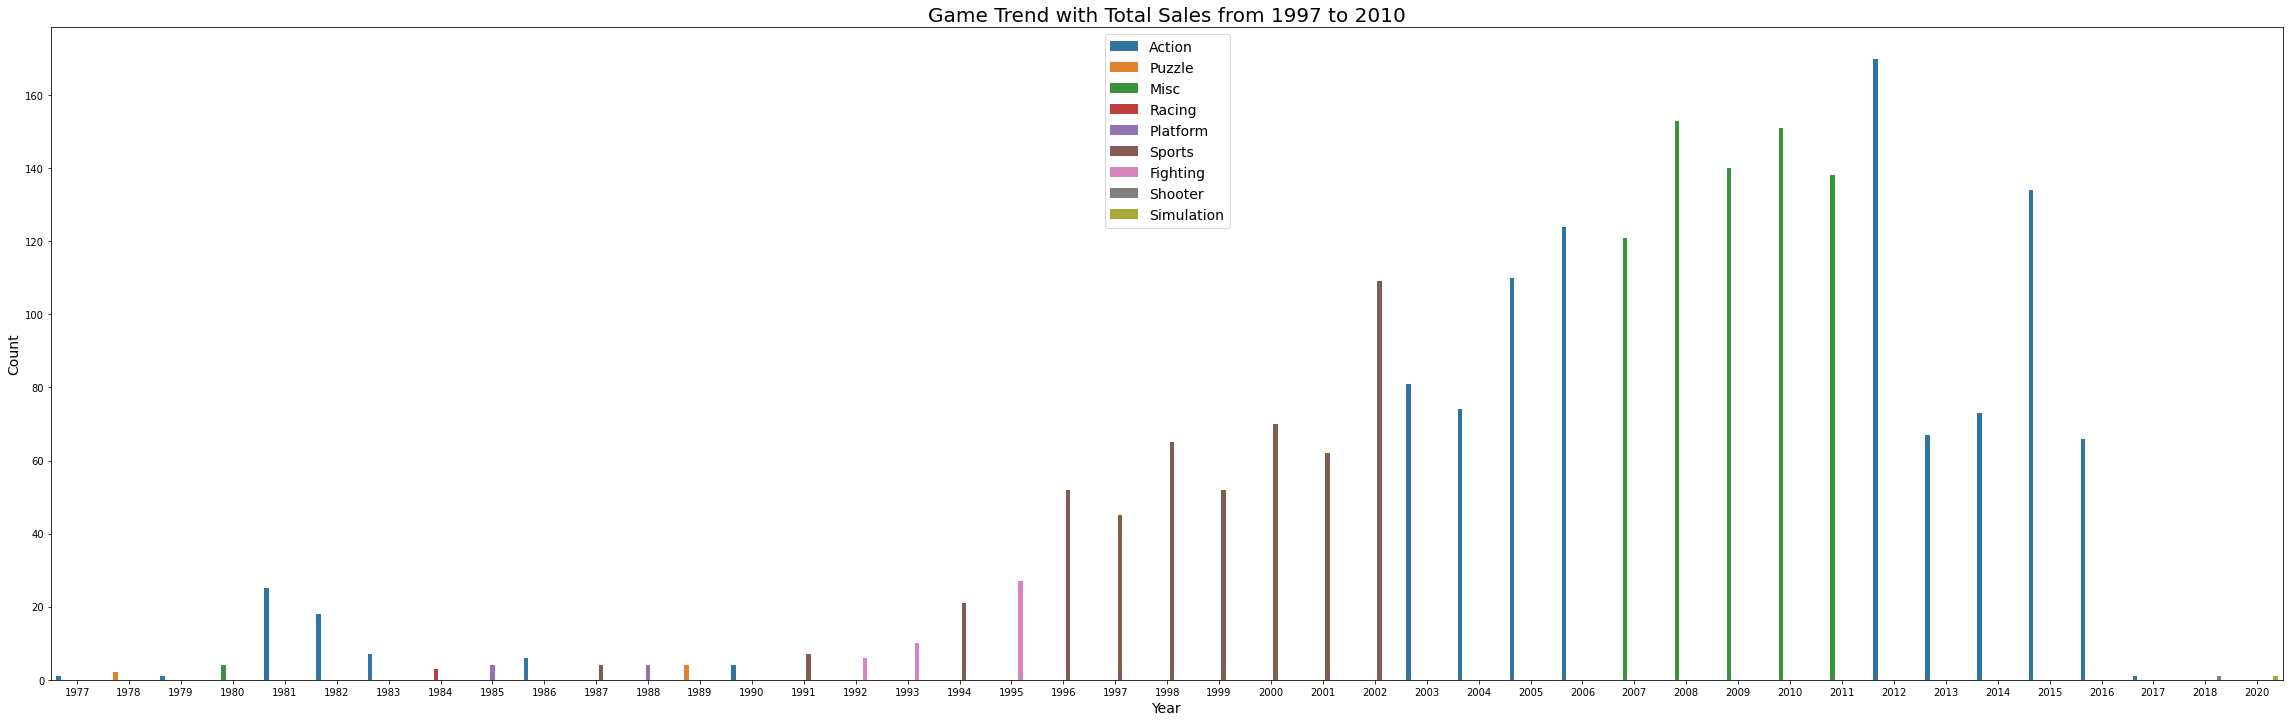

In [ ]:
#연도별 출고량에 따른 게임 트렌드
import seaborn as sns
ax = sns.barplot(x='Year', 

                  y='Count', 

                  hue='Top',

                  data=cross_df)

plt.title('Game Trend with Total Sales from 1997 to 2010', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(fontsize=14, loc='best')
plt.show()


3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

Text(0, 0.5, 'Sales')

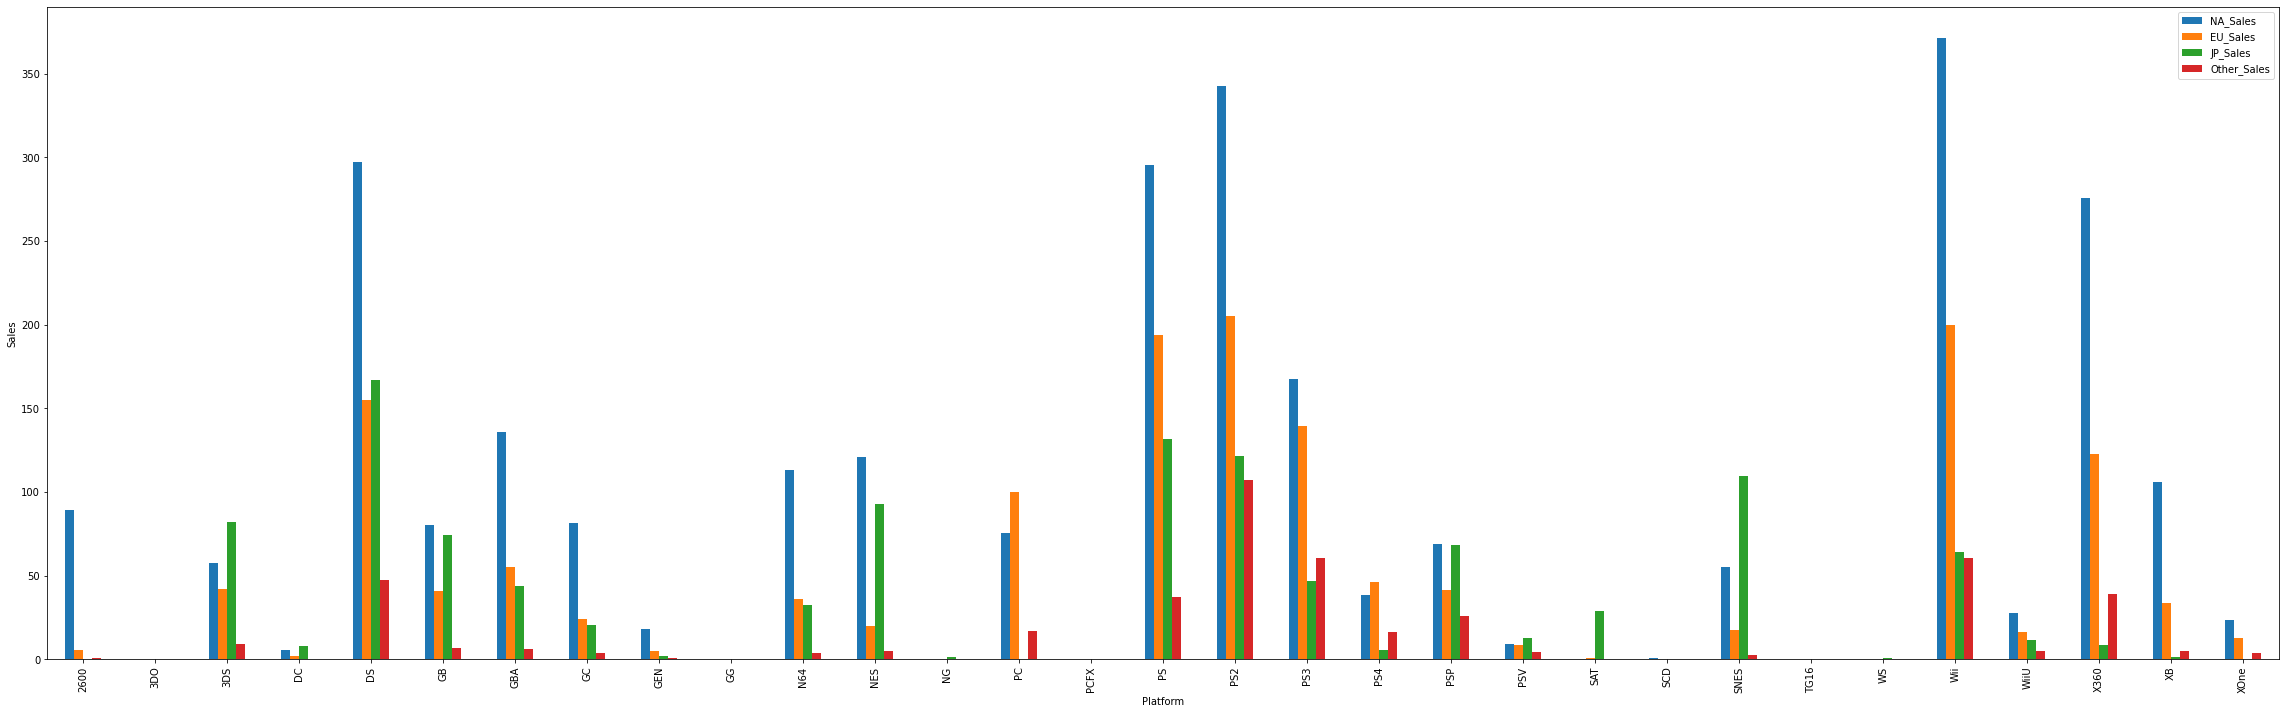

In [ ]:
#3.1 플랫폼 국가별 출고량
df3 = df2.drop(['Year', 'Total_Sales'], axis=1)
df3 = df3.groupby("Platform").sum()
year_plot = df3.plot(kind='bar')
year_plot.set_xlabel("Platform")
year_plot.set_ylabel("Sales")

In [ ]:
#3.2 플랫폼별 게임 출고량
df3 = df2[['Platform', 'Total_Sales']]
df3 = df3.groupby("Platform").sum()
df3.head()


,Total_Sales
Platform,
2600,95.56
3DO,0.10
3DS,190.40
DC,15.37
DS,666.81


Text(0, 0.5, 'Sales')

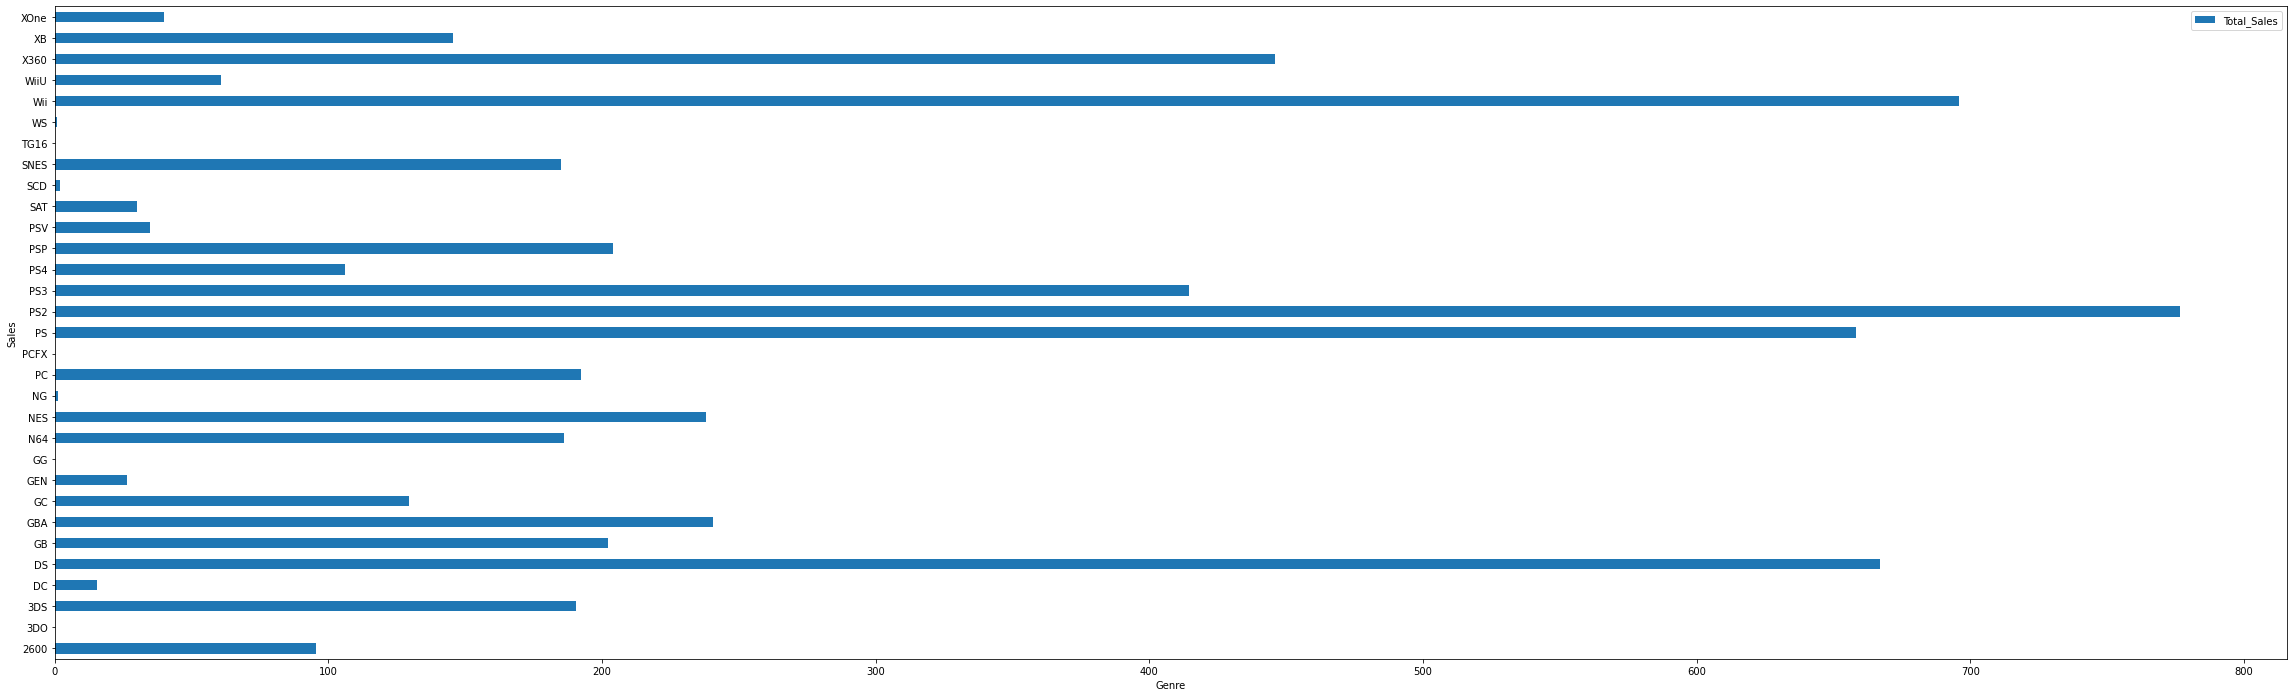

In [ ]:
year_plot = df3.plot(kind='barh')
year_plot.set_xlabel("Genre")
year_plot.set_ylabel("Sales")

In [ ]:
#3.3 Top 100 1900년도 게임
df_sort = df2.sort_values(['Total_Sales'], ascending=False)
df_sort1 = df_sort[['Name','Genre','Publisher','Platform','Year','Total_Sales']]
df_sort1 = df_sort1[df_sort1['Year'].between(1977, 1999)]
top1= df_sort1.drop(['Year'], axis=1)
top1 = top1.iloc[:100]
df_sort1.iloc[:30]

,Name,Genre,Publisher,Platform,Year,Total_Sales
247,Super Mario Bros.,Platform,Nintendo,NES,1985,40.24
938,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,GB,1996,31.38
238,Duck Hunt,Shooter,Nintendo,NES,1984,28.31
1949,Pokemon Gold/Pokemon Silver,Role-Playing,Nintendo,GB,1999,23.09
340,Super Mario World,Platform,Nintendo,SNES,1990,20.62
315,Super Mario Land,Platform,Nintendo,GB,1989,18.14
303,Super Mario Bros. 3,Platform,Nintendo,NES,1988,17.28
1565,Pokémon Yellow: Special Pikachu Edition,Role-Playing,Nintendo,GB,1998,14.64
915,Super Mario 64,Platform,Nintendo,N64,1996,11.90
403,Super Mario Land 2: 6 Golden Coins,Adventure,Nintendo,GB,1992,11.18


Text(0, 0.5, 'Genre')

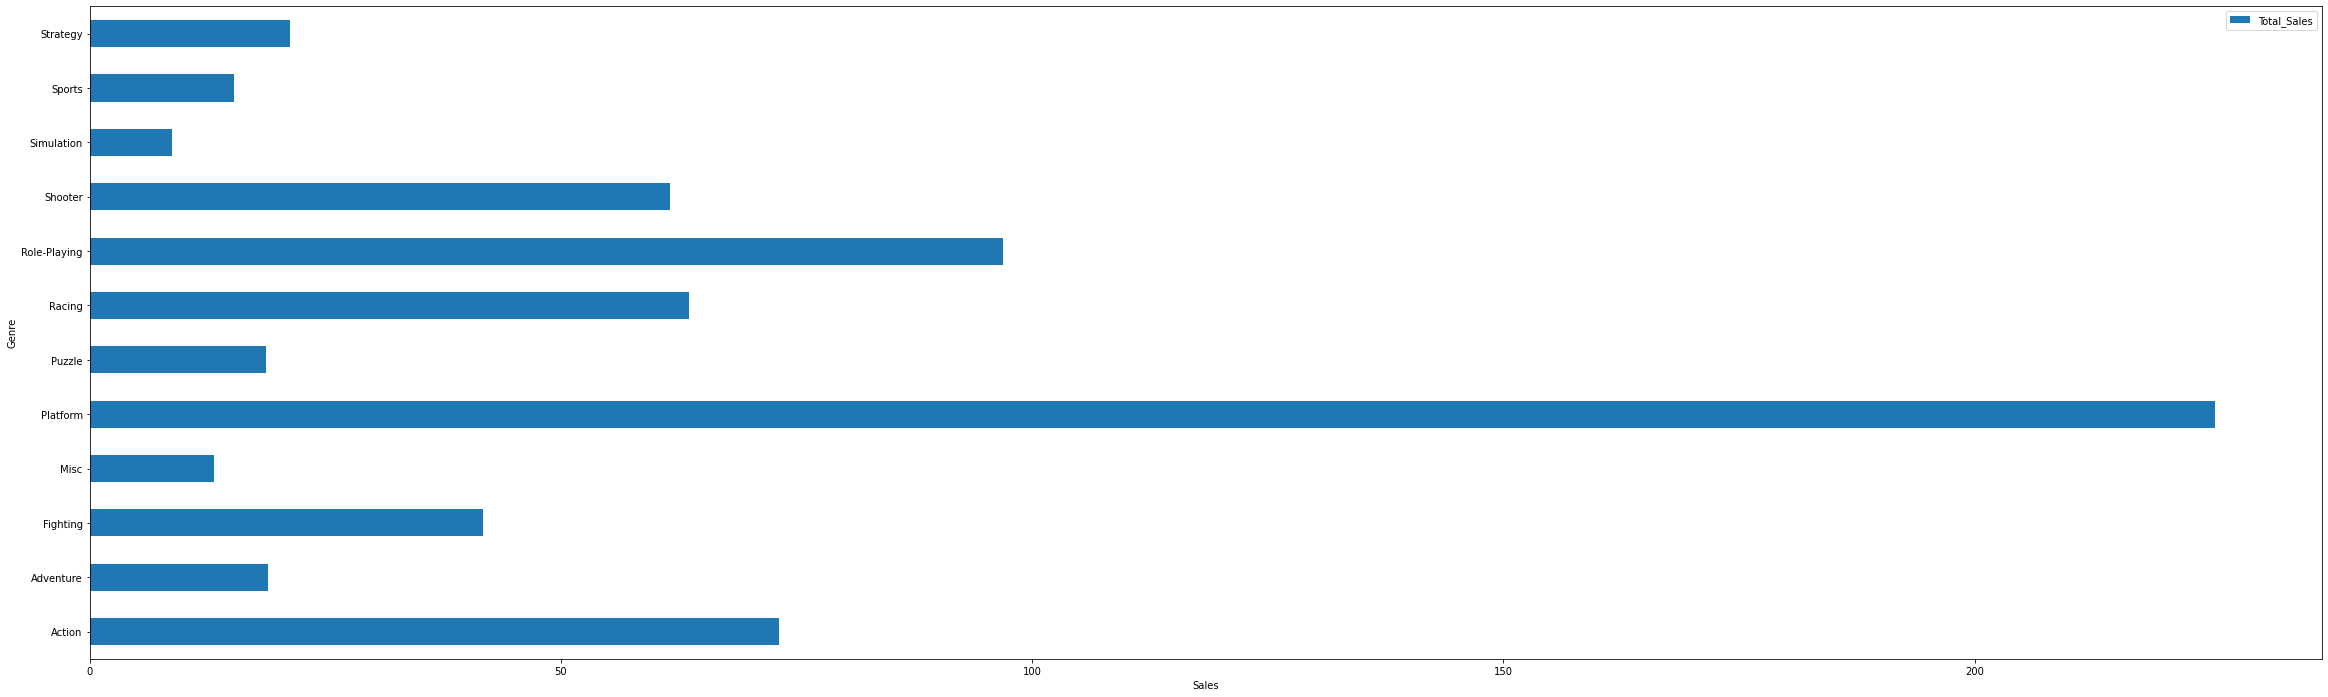

In [ ]:
#장르별 시각화
top1_plot = top1.groupby("Genre").sum().plot(kind='barh')
top1_plot.set_xlabel("Sales")
top1_plot.set_ylabel("Genre")

Text(0, 0.5, 'Platform')

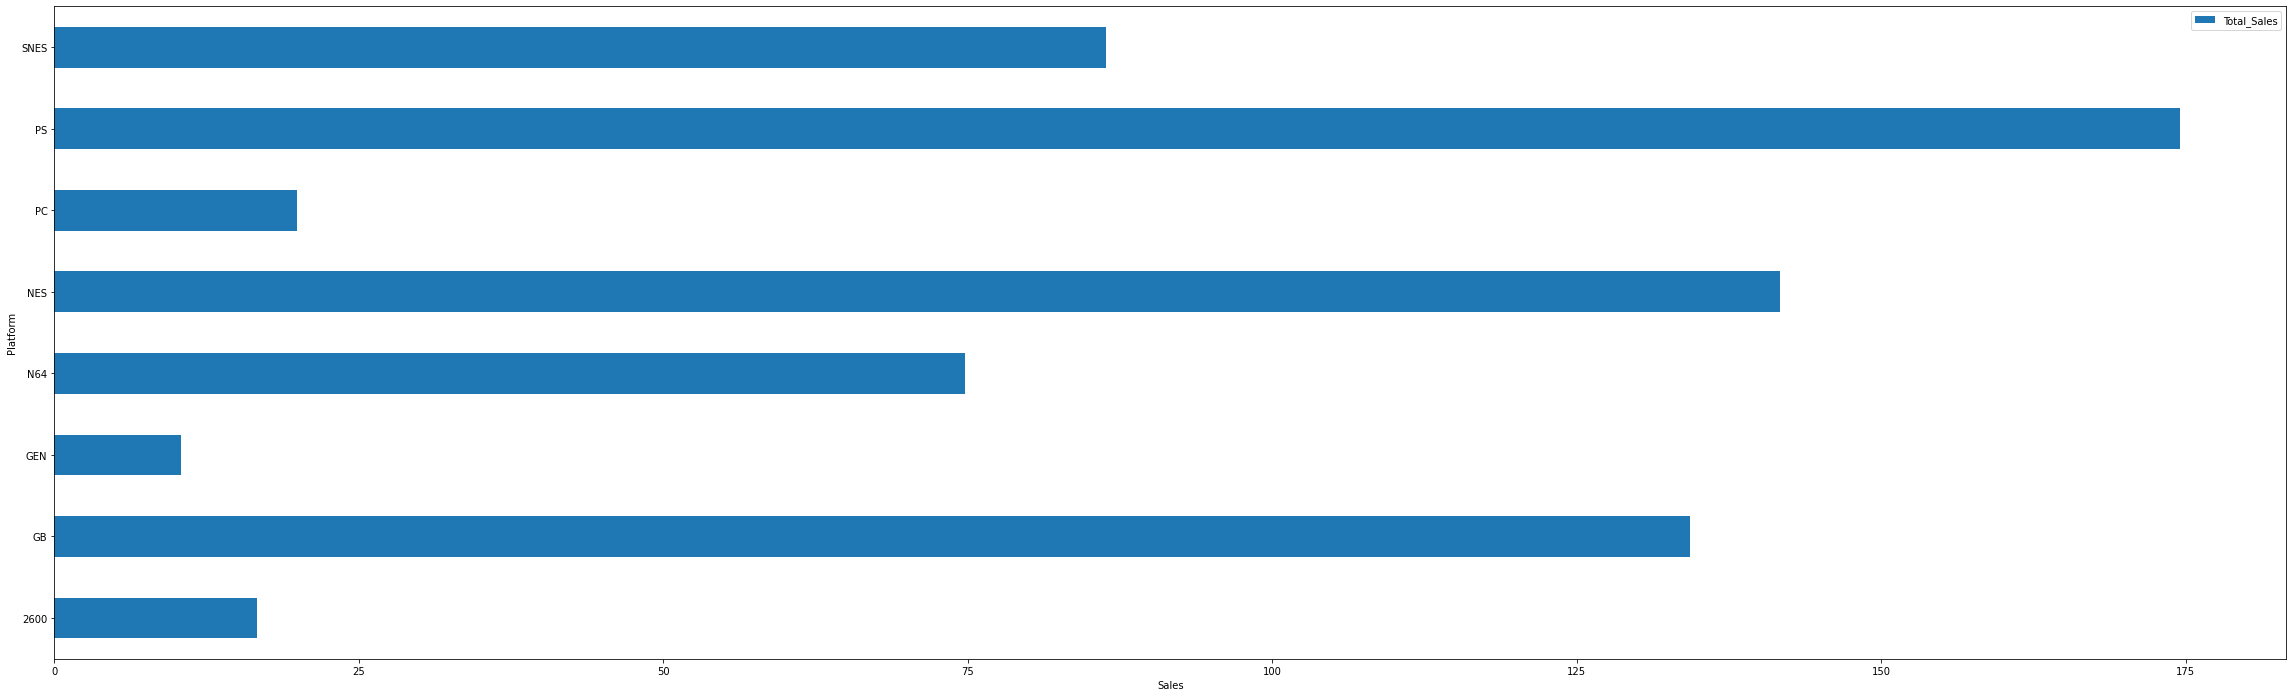

In [ ]:
#플랫폼별 시각화
top1_plot = top1.groupby("Platform").sum().plot(kind='barh')
top1_plot.set_xlabel("Sales")
top1_plot.set_ylabel("Platform")

In [ ]:
#3.4 Top 100 2000년도 Top 100 게임
df_sort = df2.sort_values(['Total_Sales'], ascending=False)
df_sort2 = df_sort[['Name','Genre','Publisher','Platform','Year','Total_Sales']]
df_sort2 = df_sort2[df_sort2['Year'].between(2000, 2009)]
top2 = df_sort2.drop(['Year'], axis=1)
top2 = top2[:100]
df_sort2.iloc[:20]

,Name,Genre,Publisher,Platform,Year,Total_Sales
6476,Wii Sports,Sports,Nintendo,Wii,2006,82.74
9627,Mario Kart Wii,Racing,Nintendo,Wii,2008,35.83
10278,Wii Sports Resort,Sports,Nintendo,Wii,2009,33.00
6700,New Super Mario Bros.,Platform,Nintendo,DS,2006,30.01
6487,Wii Play,Misc,Nintendo,Wii,2006,29.01
11397,New Super Mario Bros. Wii,Platform,Nintendo,Wii,2009,28.61
5962,Nintendogs,Simulation,Nintendo,DS,2005,24.75
5940,Mario Kart DS,Racing,Nintendo,DS,2005,23.43
7564,Wii Fit,Sports,Nintendo,Wii,2007,22.72
10919,Wii Fit Plus,Sports,Nintendo,Wii,2009,22.00


Text(0, 0.5, 'Genre')

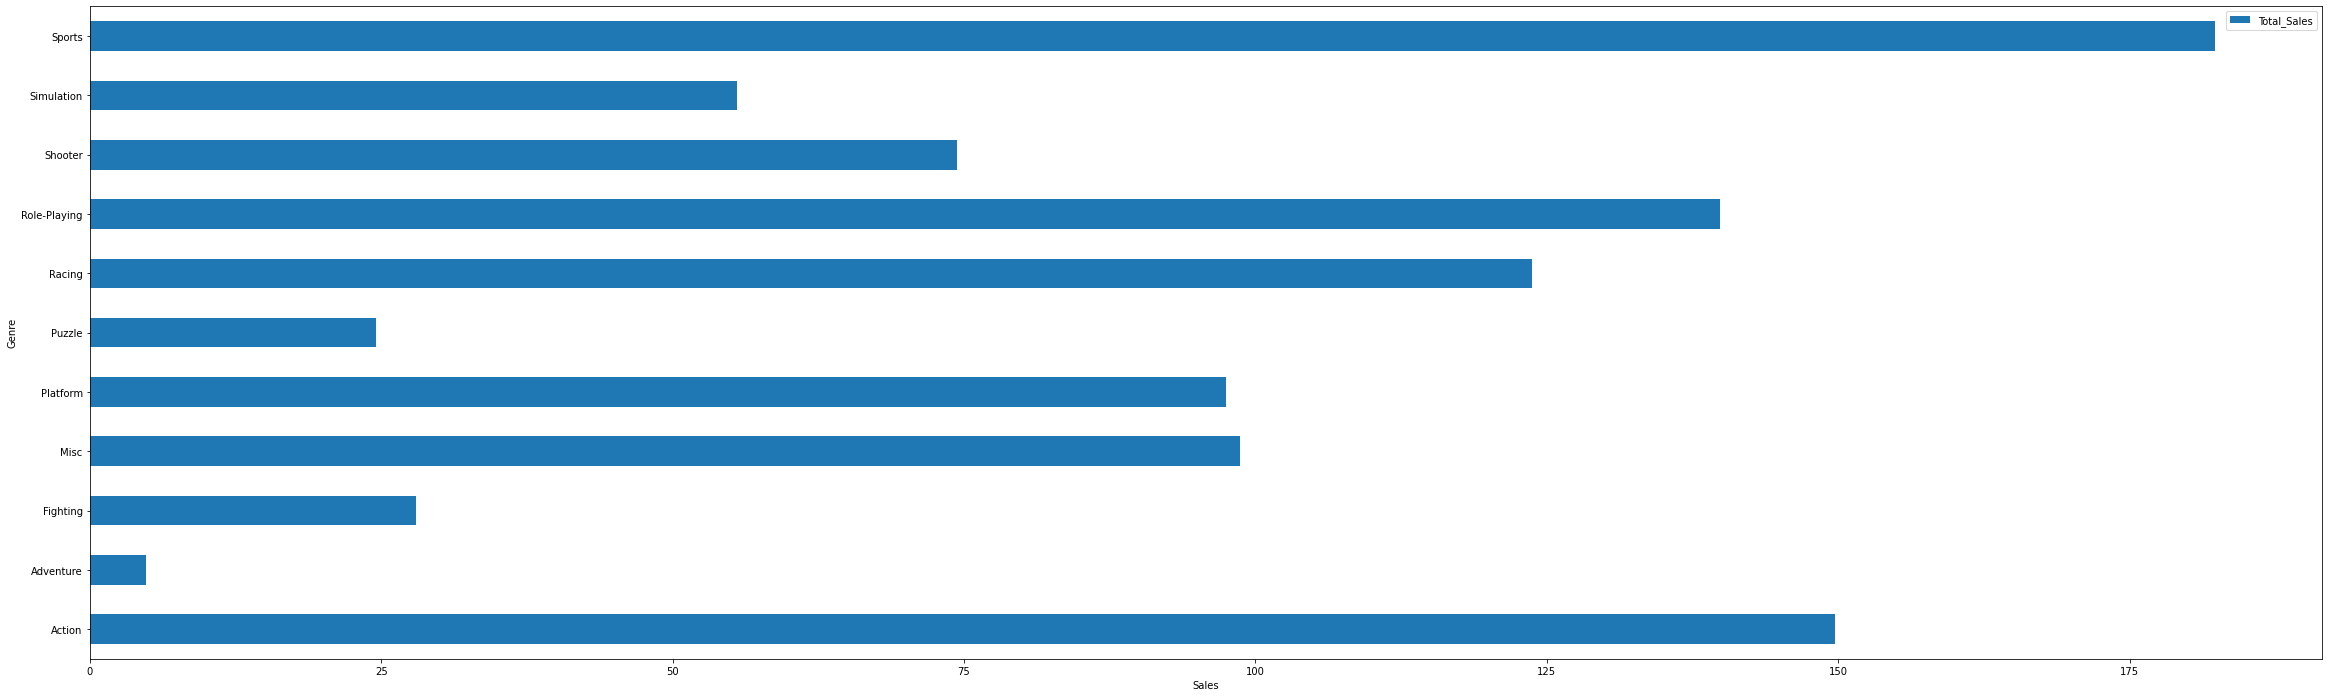

In [ ]:
#장르별 시각화
top2_plot = top2.groupby("Genre").sum().plot(kind='barh')
top2_plot.set_xlabel("Sales")
top2_plot.set_ylabel("Genre")

Text(0, 0.5, 'Platform')

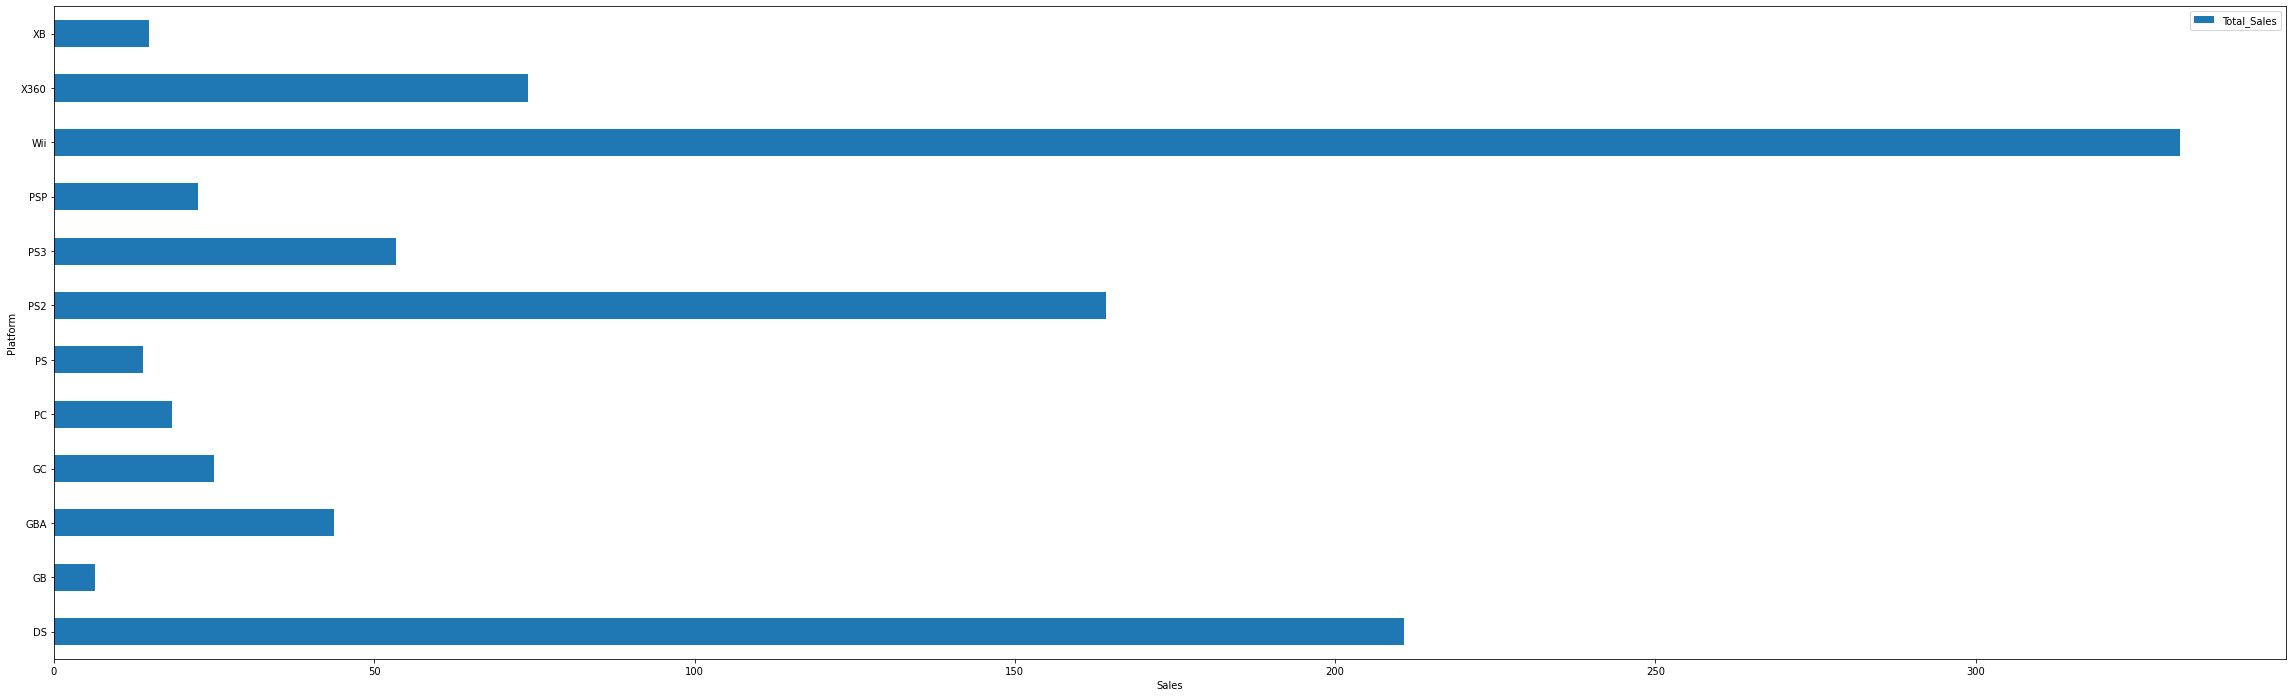

In [ ]:
#플랫폼별 시각화
top2_plot = top2.groupby("Platform").sum().plot(kind='barh')
top2_plot.set_xlabel("Sales")
top2_plot.set_ylabel("Platform")

In [ ]:
#3.4 Top 100 2010년도 게임
df_sort = df2.sort_values(['Total_Sales'], ascending=False)
df_sort3 = df_sort[['Name','Genre','Publisher','Platform','Year','Total_Sales']]
df_sort3 = df_sort3[df_sort3['Year'].between(2010, 2020)]
top3 = df_sort3.drop(['Year'], axis=1)
top3 = top3.iloc[:100]
df_sort3.iloc[:20]

,Name,Genre,Publisher,Platform,Year,Total_Sales
11739,Kinect Adventures!,Misc,Microsoft Game Studios,X360,2010,21.82
14630,Grand Theft Auto V,Action,Take-Two Interactive,PS3,2013,21.39
59,Pokemon Black/Pokemon White,Role-Playing,Nintendo,DS,2010,15.32
12910,Call of Duty: Modern Warfare 3,Shooter,Activision,X360,2011,14.76
15962,Call of Duty: Black Ops 3,Shooter,Activision,PS4,2015,14.24
14017,Call of Duty: Black Ops II,Shooter,Activision,PS3,2012,14.04
13473,Mario Kart 7,Racing,Nintendo,3DS,2011,12.21
15222,Pokemon Omega Ruby/Pokemon Alpha Sapphire,Role-Playing,Nintendo,3DS,2014,11.33
13564,Super Mario 3D Land,Platform,Nintendo,3DS,2011,10.79
11869,Gran Turismo 5,Racing,Sony Computer Entertainment,PS3,2010,10.77


Text(0, 0.5, 'Genre')

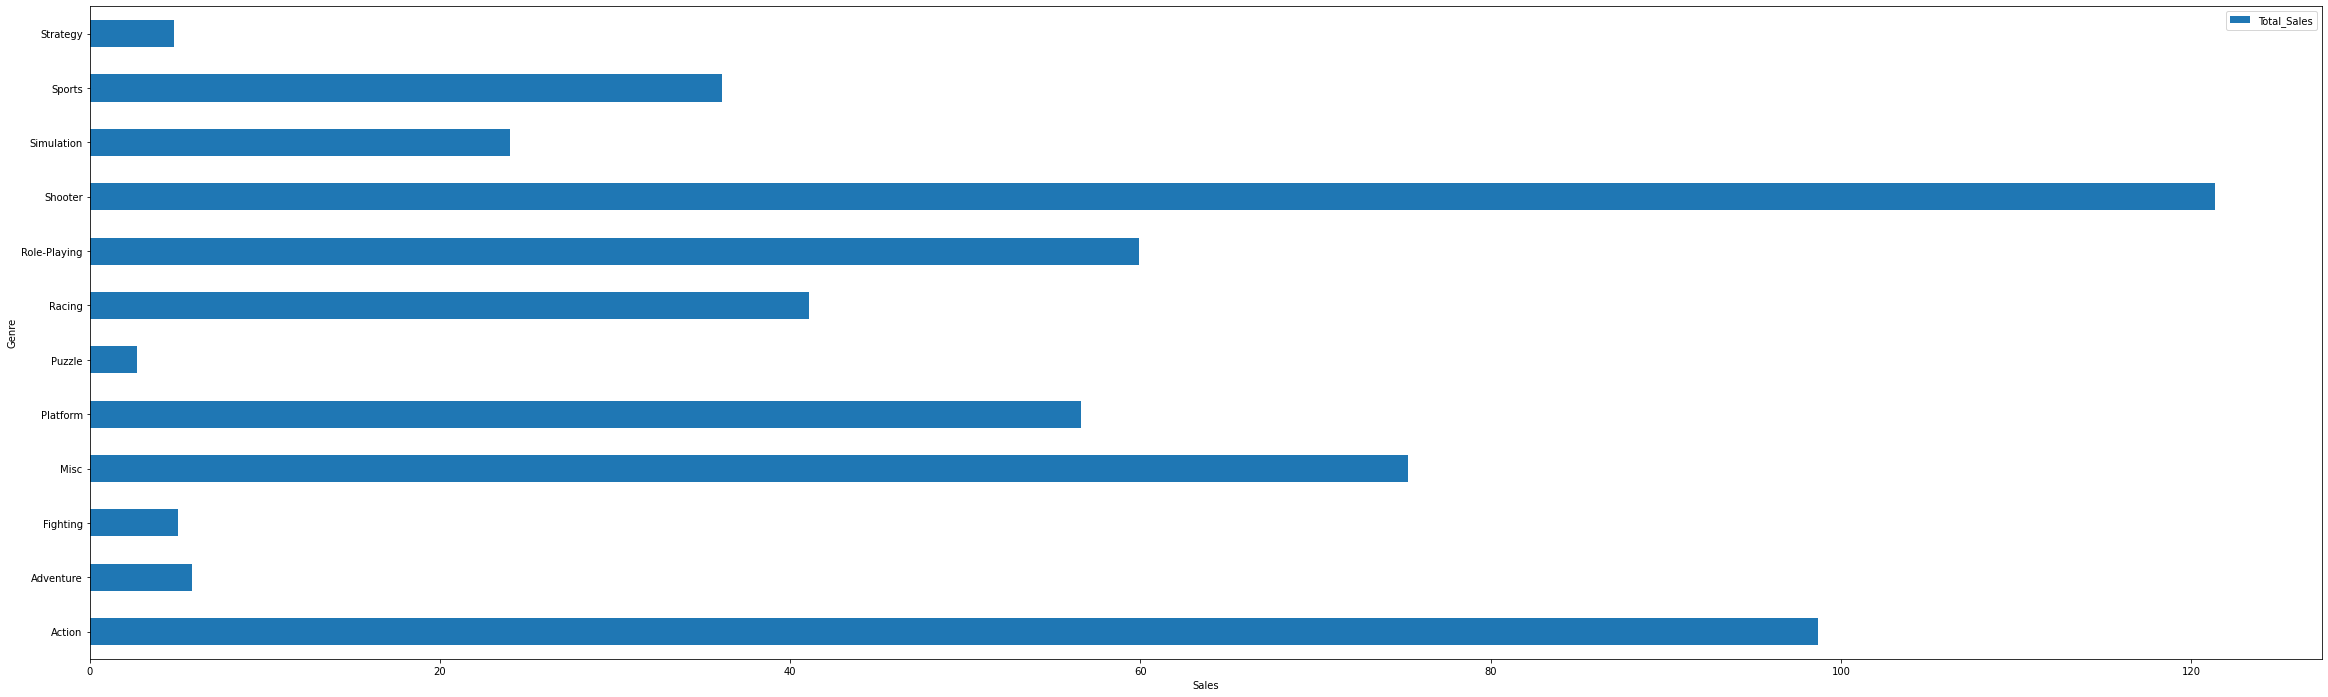

In [ ]:
#장르별 시각화
top3_plot = top3.groupby("Genre").sum().plot(kind='barh')
top3_plot.set_xlabel("Sales")
top3_plot.set_ylabel("Genre")

Text(0, 0.5, 'Platform')

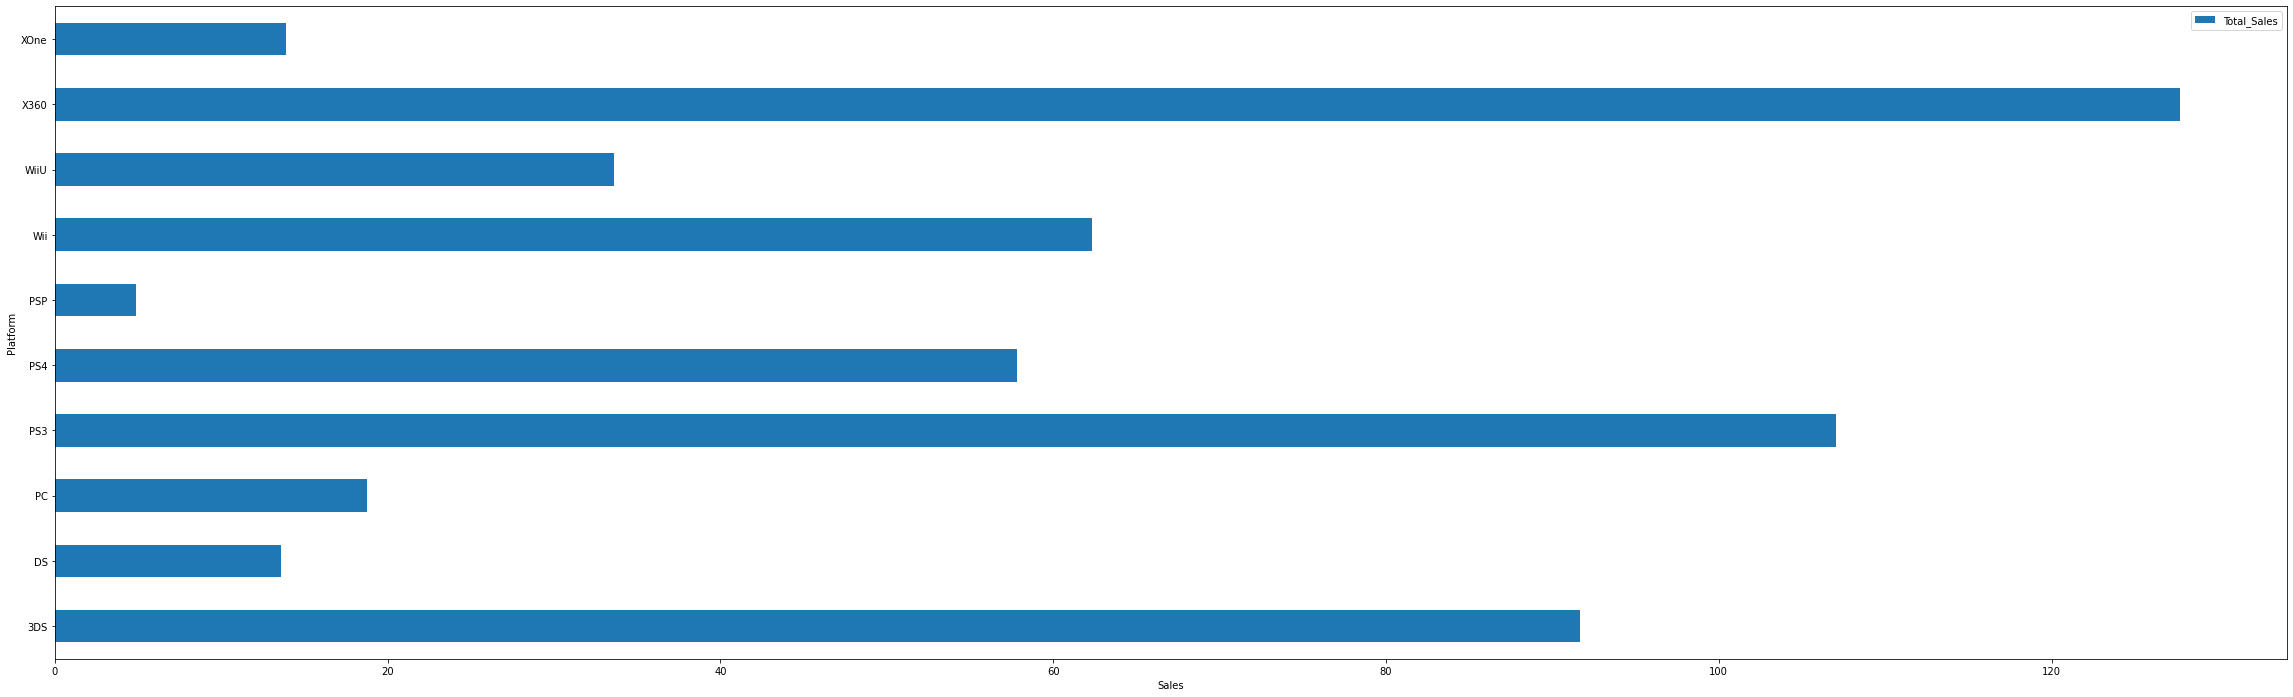

In [ ]:
#플랫폼별 시각화
top3_plot = top3.groupby("Platform").sum().plot(kind='barh')
top3_plot.set_xlabel("Sales")
top3_plot.set_ylabel("Platform")

In [ ]:
#1900년대 장르별 경쟁업체
count1 = df_sort1.iloc[:100]
count1 = pd.crosstab(count1.Genre, count1.Year)
count1 = count1.T
count1['Top'] = count1.idxmax(axis=1)
count1['Count'] = count1.max(axis=1)
count1 = count1.reset_index()
count1 = count1[count1['Year'].between(1977, 1999)]
Platform = count1['Platform'].sum()
Role_Playing = count1['Role-Playing'].sum()
Action = count1['Action'].sum()
print(Platform, Role_Playing, Action)

27 8 16


In [ ]:
#1900년대 플랫폼별 경쟁업체
pcount1 = df_sort1[:100]
pcount1 = pd.crosstab(pcount1.Platform, pcount1.Year)
pcount1 = pcount1.T
pcount1['Top'] = pcount1.idxmax(axis=1)
pcount1['Count'] = pcount1.max(axis=1)
pcount1 = pcount1.reset_index()
pcount1 = pcount1[pcount1['Year'].between(1977, 1999)]
PS = pcount1['PS'].sum()
GB = pcount1['GB'].sum()
N64 = pcount1['N64'].sum()
print(Platform, GB, N64)

27 13 14


In [ ]:
#2000년대 장르별 경쟁업체
count2 = df_sort2.iloc[:100]
count2 = pd.crosstab(count2.Genre, count2.Year)
count2 = count2.T
count2['Top'] = count2.idxmax(axis=1)
count2['Count'] = count2.max(axis=1)
count2 = count2.reset_index()
count2 = count2[count2['Year'].between(2000, 2009)]
Action = count2['Action'].sum()
Role_Playing = count2['Role-Playing'].sum()
Sports = count2['Sports'].sum()
print(Action, Role_Playing, Sports)

19 20 8


In [ ]:
#2000년대 플랫폼별 경쟁업체
pcount2 = df_sort2[:100]
pcount2 = pd.crosstab(pcount2.Platform, pcount2.Year)
pcount2 = pcount2.T
pcount2['Top'] = pcount2.idxmax(axis=1)
pcount2['Count'] = pcount2.max(axis=1)
pcount2 = pcount2.reset_index()
pcount2 = pcount2[pcount2['Year'].between(2000, 2009)]
PS2 = pcount2['PS2'].sum()
DS = pcount2['DS'].sum()
Wii = pcount2['Wii'].sum()
print(Platform, DS, Wii)

27 17 18


In [ ]:
#2010년대 장르별 경쟁업체
count3 = df_sort3.iloc[:100]
count3 = pd.crosstab(count3.Genre, count3.Year)
count3 = count3.T
count3['Top'] = count3.idxmax(axis=1)
count3['Count'] = count3.max(axis=1)
count3 = count3.reset_index()
count3 = count3[count3['Year'].between(2010, 2020)]
Action = count3['Action'].sum()
Role_Playing = count3['Role-Playing'].sum()
Shooter = count3['Shooter'].sum()
print(Action, Role_Playing, Shooter)

19 15 21


In [ ]:
#2010년대 플랫폼별 경쟁업체
pcount3 = df_sort3[:100]
pcount3 = pd.crosstab(pcount3.Platform, pcount3.Year)
pcount3 = pcount3.T
pcount3['Top'] = pcount3.idxmax(axis=1)
pcount3['Count'] = pcount3.max(axis=1)
pcount3 = pcount3.reset_index()
pcount3 = pcount3[pcount3['Year'].between(2010, 2020)]
PS3 = pcount3['PS3'].sum()
X360 = pcount3['X360'].sum()
Wii = pcount3['Wii'].sum()
print(PS3, X360, Wii)

19 21 12


In [ ]:
#플랫폼별 Sales 변화
pd_sort1 = df_sort1.groupby("Platform").sum()
pd_sort2 = df_sort2.groupby("Platform").sum()
pd_sort3 = df_sort3.groupby("Platform").sum()
platform_sort = pd_sort2.copy()
platform_sort = platform_sort.drop(['Total_Sales'], axis=1)
platform_sort['Total_Sales1'] = (pd_sort1['Total_Sales'])
platform_sort['Total_Sales2'] = (pd_sort2['Total_Sales'])
platform_sort['Total_Sales3'] = (pd_sort3['Total_Sales'])
platform_sort['Change1'] = (pd_sort2['Total_Sales'] - pd_sort1['Total_Sales'])
platform_sort['Change2'] = (pd_sort3['Total_Sales'] - pd_sort2['Total_Sales'])
platform_sort

,Year,Total_Sales1,Total_Sales2,Total_Sales3,Change1,Change2
Platform,,,,,,
DC,58025,8.21,7.16,NaN,-1.05,NaN
DS,2756299,0.02,570.50,96.29,570.48,-474.21
GB,44009,179.38,22.86,NaN,-156.52,NaN
GBA,1249979,0.11,240.60,NaN,240.49,NaN
GC,526860,0.28,129.13,NaN,128.85,NaN
N64,102010,157.27,28.65,NaN,-128.62,NaN
PC,649950,45.72,71.92,74.53,26.20,2.61
PS,504131,543.69,114.45,NaN,-429.24,NaN
PS2,2998319,0.17,774.61,1.94,774.44,-772.67


In [ ]:
#장르별 Sales 변화
gd_sort1 = df_sort1.groupby("Genre").sum()
gd_sort2 = df_sort2.groupby("Genre").sum()
gd_sort3 = df_sort3.groupby("Genre").sum()
genre_sort = gd_sort2.copy()
genre_sort = genre_sort.drop(['Total_Sales'], axis=1)
genre_sort['Total_Sales1'] = (gd_sort1['Total_Sales'])
genre_sort['Total_Sales2'] = (gd_sort2['Total_Sales'])
genre_sort['Total_Sales3'] = (gd_sort3['Total_Sales'])
genre_sort['Change1'] = (gd_sort2['Total_Sales'] - gd_sort1['Total_Sales'])
genre_sort['Change2'] = (gd_sort3['Total_Sales'] - gd_sort2['Total_Sales'])
genre_sort

,Year,Total_Sales1,Total_Sales2,Total_Sales3,Change1,Change2
Genre,,,,,,
Action,1885009,176.27,491.26,286.02,314.99,-205.24
Adventure,1065462,50.26,98.66,40.93,48.40,-57.73
Fighting,659622,114.87,161.20,36.88,46.33,-124.32
Misc,1542773,68.03,357.11,154.74,289.08,-202.37
Platform,707469,310.93,270.51,93.13,-40.42,-177.38
Puzzle,625938,61.92,110.38,18.65,48.46,-91.73
Racing,964081,152.85,300.79,72.16,147.94,-228.63
Role-Playing,1315627,190.44,364.92,193.12,174.48,-171.80
Shooter,950385,124.69,262.28,194.56,137.59,-67.72


In [ ]:
######## 궁금증 테스트 (cluster이 될까)
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df1_sort = df2.drop((['Total_Sales']), axis =1)
#Label로 지정
publisher_label = df1_sort['Publisher']
platform_label = df1_sort['Platform']
genre_label = df1_sort['Genre']

#숫자 데이터
number = df1_sort[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

#정규화
scaler = StandardScaler()
scaler.fit(number)
number = scaler.transform(number)
number


In [ ]:
#Elbow methods
sum_of_sqd = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(number)
    sum_of_sqd.append(km.inertia_)

plt.plot(K, sum_of_sqd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k2_means = KMeans(n_clusters=2, random_state=42)
k2_means.fit(number)
clusters = k2_means.labels_
series = pd.Series(clusters)
series

In [ ]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(number)
final_df = pd.DataFrame(data = pc, columns = ['PC1','PC2'])
final_df['Cluster'] = series
final_df

In [ ]:
label_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
label_df['Publisher'] = pd.Series(publisher_label)
label_df

In [ ]:
sns.scatterplot(data = label_df ,x='PC1',y='PC2', hue='Publisher')
plt.title('Diagnosis Labeled')
plt.show()